In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from helpers import *

## Import data

In [2]:
data = pd.read_csv("../data/train.csv")
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
for i, column in enumerate(data.columns):
    if column.endswith('phi'):
        print(i - 2, column)

15 PRI_tau_phi
18 PRI_lep_phi
20 PRI_met_phi
25 PRI_jet_leading_phi
28 PRI_jet_subleading_phi


In [3]:
data.describe()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [4]:
data.isnull().describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000,...,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000,...,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000


No missing values in the dataset.

## Data pre-processing

In [5]:
data["Prediction_enum"] = data["Prediction"].replace({"s": 1, "b": 0})
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction_enum
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [6]:
data.describe()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction_enum
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,0.342668
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,0.474603
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,0.000000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,1.000000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,1.000000


In [7]:
data["Prediction"].value_counts()

b    164333
s     85667
Name: Prediction, dtype: int64

In [8]:
data["Prediction_enum"].value_counts()

0    164333
1     85667
Name: Prediction_enum, dtype: int64

In [9]:
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction_enum
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [10]:
prediction_data = data.loc[:,"DER_mass_MMC":]
prediction_data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction_enum
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [11]:
X, y = prediction_data.loc[:, :"PRI_jet_all_pt"], prediction_data.loc[:, "Prediction_enum"]
print(X.shape, y.shape)

(250000, 30) (250000,)


In [12]:
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [13]:
X["PRI_jet_num"].describe()

count    250000.000000
mean          0.979176
std           0.977426
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: PRI_jet_num, dtype: float64

The only integer column has no -999.0 or similar values that we interpert as Nones

In [14]:
X.isin([-999.0]).any().value_counts()

False    19
True     11
dtype: int64

Selecting colums with Nones

In [15]:
none_colunms = X.loc[:, X.isin([-999.0]).any()]
none_colunms

,DER_mass_MMC,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
0,138.470,0.91,124.711,2.666,0.2,67.435,2.150,0.444,46.062,1.24,-2.475
1,160.937,-999.00,-999.000,-999.000,-999.0,46.226,0.725,1.158,-999.000,-999.00,-999.000
2,-999.000,-999.00,-999.000,-999.000,-999.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000
3,143.905,-999.00,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000
4,175.864,-999.00,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000
...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,-999.00,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000
249996,-999.000,-999.00,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000
249997,105.457,-999.00,-999.000,-999.000,-999.0,41.992,1.800,-0.166,-999.000,-999.00,-999.000
249998,94.951,-999.00,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000


In [16]:
none_colunms.describe()

,DER_mass_MMC,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,-708.420675,-601.237051,-709.356603,-708.985189,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631
std,406.345647,454.480565,657.972302,453.019877,453.596721,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,78.100750,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,105.012000,-999.000000,-999.000000,-999.000000,-999.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000
75%,130.606250,0.490000,83.446000,-4.593000,0.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000
max,1192.026000,8.503000,4974.979000,16.690000,1.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000


### Dealing with nulls

For numerical variable mean-impuation is performed if its distribution is symmetric(or almost symmetric or normal). On the other hand, for a variable with skewed distribution and outliers, meadian-imputation is recommended as median is more immune to outliers than mean.

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant. So simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To solve this, we can group our data by some variables that have no missing values and for each subset compute the median age to impute the missing values. Or we can build a linear regression model that will predict missing values of Age using the features that have no missing values. These two methods may result in better accuracy without high bias, unless a missing value is expected to have a very high variance. We will show the former method of imputation.

I suggest we try all:
- Do nothing and train with these values
- Propose categorization (not often a very good idea, but it can be interesting)
- Try replacing with mean or median, depending on what seems more apporopriate
- Try learn missing values with regression

#### DER_mass_MMC

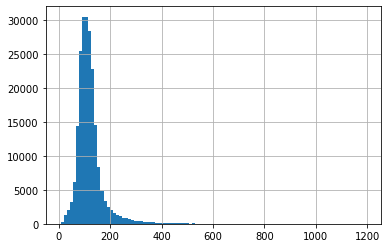

In [17]:
der_mass_mmc = none_colunms["DER_mass_MMC"][none_colunms["DER_mass_MMC"] != -999.0]
der_mass_mmc.hist(bins=100);

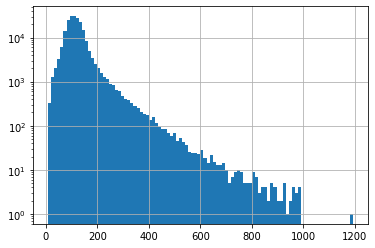

In [18]:
der_mass_mmc.hist(bins=100, log=True);

In [19]:
print(f"Full size {none_colunms['DER_mass_MMC'].shape} and without nulls {der_mass_mmc.shape}")

Full size (250000,) and without nulls (211886,)


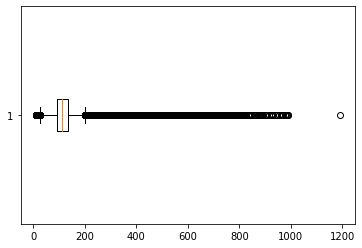

In [20]:
plt.boxplot(der_mass_mmc, vert=False);

We should certanly use median for replacing -999.0.

In [21]:
print(f"Mean is {der_mass_mmc.mean()} and median is {der_mass_mmc.median()}")

Mean is 121.85852835958778 and median is 112.406


#### DER_deltaeta_jet_jet

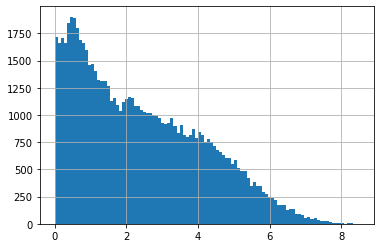

In [22]:
der_deltaeta = none_colunms["DER_deltaeta_jet_jet"][none_colunms["DER_deltaeta_jet_jet"] != -999.0]
der_deltaeta.hist(bins=100);

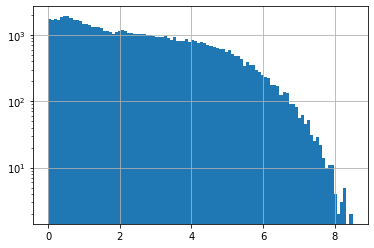

In [23]:
der_deltaeta.hist(bins=100, log=True);

In [24]:
print(f"Full size {none_colunms['DER_deltaeta_jet_jet'].shape} and without nulls {der_deltaeta.shape}")

Full size (250000,) and without nulls (72543,)


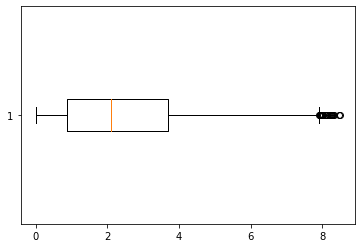

In [25]:
plt.boxplot(der_deltaeta, vert=False);

In [26]:
print(f"Mean is {der_deltaeta.mean()} and median is {der_deltaeta.median()}")

Mean is 2.4037350261224666 and median is 2.1069999999999998


#### DER_mass_jet_jet

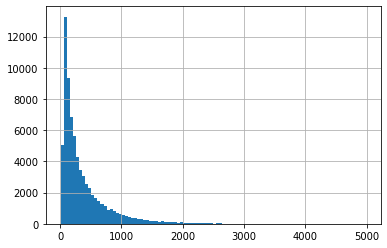

In [27]:
der_mass_jer = none_colunms["DER_mass_jet_jet"][none_colunms["DER_mass_jet_jet"] != -999.0]
der_mass_jer.hist(bins=100);

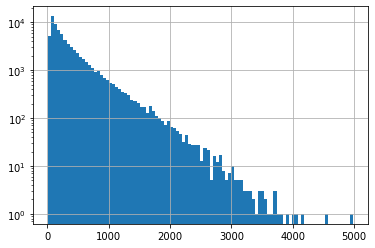

In [28]:
der_mass_jer.hist(bins=100, log=True);

In [29]:
print(f"Full size {none_colunms['DER_mass_jet_jet'].shape} and without nulls {der_mass_jer.shape}")

Full size (250000,) and without nulls (72543,)


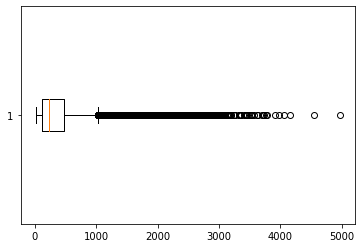

In [30]:
plt.boxplot(der_mass_jer, vert=False);

In [31]:
print(f"Mean is {der_mass_jer.mean()} and median is {der_mass_jer.median()}")

Mean is 371.7833604482821 and median is 225.885


#### DER_prodeta_jet_jet

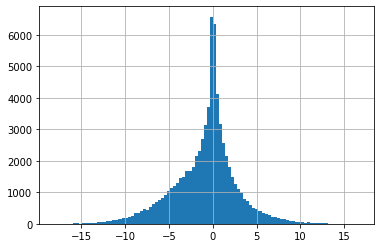

In [32]:
der_prodeta = none_colunms["DER_prodeta_jet_jet"][none_colunms["DER_prodeta_jet_jet"] != -999.0]
der_prodeta.hist(bins=100);

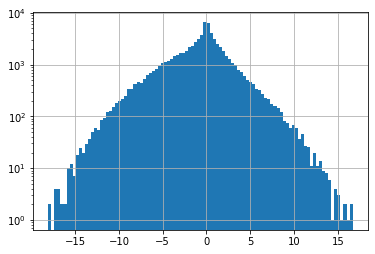

In [33]:
der_prodeta.hist(bins=100, log=True);

In [34]:
print(f"Full size {none_colunms['DER_prodeta_jet_jet'].shape} and without nulls {der_prodeta.shape}")

Full size (250000,) and without nulls (72543,)


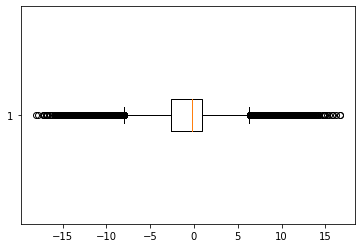

In [35]:
plt.boxplot(der_prodeta, vert=False);

In [36]:
print(f"Mean is {der_prodeta.mean()} and median is {der_prodeta.median()}")

Mean is -0.8216881711536685 and median is -0.244


#### DER_lep_eta_centrality

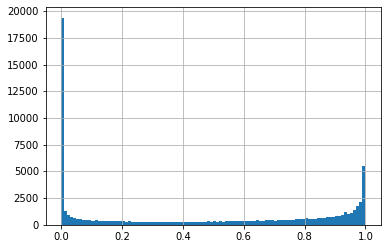

In [37]:
der_lep_eta = none_colunms["DER_lep_eta_centrality"][none_colunms["DER_lep_eta_centrality"] != -999.0]
der_lep_eta.hist(bins=100);

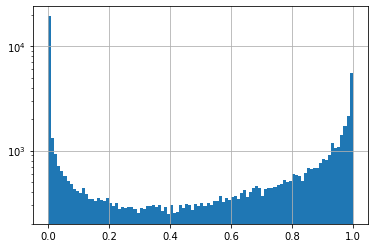

In [38]:
der_lep_eta.hist(bins=100, log=True);

In [39]:
print(f"Full size {none_colunms['DER_lep_eta_centrality'].shape} and without nulls {der_lep_eta.shape}")

Full size (250000,) and without nulls (72543,)


Interestingly it seems that same particles are missing the same values among 3 last columns. Is there any relation between this and particle being boson?

In [40]:
none_colunms.join(y)[none_colunms["DER_lep_eta_centrality"] != -999.0]["Prediction_enum"].value_counts()

0    40078
1    32465
Name: Prediction_enum, dtype: int64

In this case it seems more to be more likely boson if this values are not missing.

In [41]:
none_colunms.join(y)[none_colunms["DER_mass_MMC"] == -999.0]["Prediction_enum"].value_counts()

0    35279
1     2835
Name: Prediction_enum, dtype: int64

In [42]:
data["Prediction_enum"].value_counts()

0    164333
1     85667
Name: Prediction_enum, dtype: int64

On the other hand, if `DER_mass_MMC` is missing value seems that could indicate that it is not boson.

In [43]:
none_colunms[
             (none_colunms["DER_deltaeta_jet_jet"] == -999.0) 
             & (none_colunms["DER_mass_jet_jet"] == -999.0) 
             & (none_colunms["DER_prodeta_jet_jet"] == -999.0)
             & (none_colunms["DER_lep_eta_centrality"] == -999.0)]

,DER_mass_MMC,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
1,160.937,-999.0,-999.0,-999.0,-999.0,46.226,0.725,1.158,-999.0,-999.0,-999.0
2,-999.000,-999.0,-999.0,-999.0,-999.0,44.251,2.053,-2.028,-999.0,-999.0,-999.0
3,143.905,-999.0,-999.0,-999.0,-999.0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0
4,175.864,-999.0,-999.0,-999.0,-999.0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0
7,154.916,-999.0,-999.0,-999.0,-999.0,30.638,-0.715,-1.724,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,-999.0,-999.0,-999.0,-999.0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0
249996,-999.000,-999.0,-999.0,-999.0,-999.0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0
249997,105.457,-999.0,-999.0,-999.0,-999.0,41.992,1.800,-0.166,-999.0,-999.0,-999.0
249998,94.951,-999.0,-999.0,-999.0,-999.0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0


In [44]:
print(f"Mean is {der_lep_eta.mean()} and median is {der_lep_eta.median()}")

Mean is 0.4582898005321013 and median is 0.45399999999999996


#### PRI_jet_leading_pt

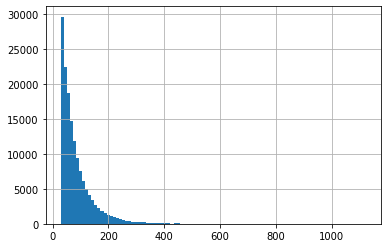

In [45]:
pri_jet_leading = none_colunms["PRI_jet_leading_pt"][none_colunms["PRI_jet_leading_pt"] != -999.0]
pri_jet_leading.hist(bins=100);

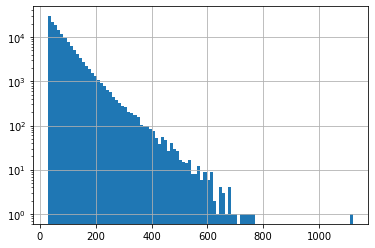

In [46]:
pri_jet_leading.hist(bins=100, log=True);

In [47]:
print(f"Full size {none_colunms['PRI_jet_leading_pt'].shape} and without nulls {pri_jet_leading.shape}")

Full size (250000,) and without nulls (150087,)


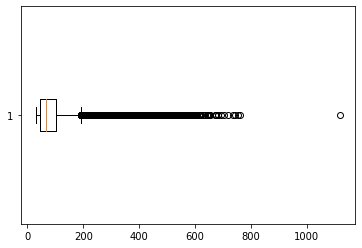

In [48]:
plt.boxplot(pri_jet_leading, vert=False);

In [49]:
print(f"Mean is {pri_jet_leading.mean()} and median is {pri_jet_leading.median()}")

Mean is 84.82210453270471 and median is 65.561


Here it seems like using `mean` should be better option if we subistitue -999.0.

In [50]:
none_colunms.join(y)[none_colunms["PRI_jet_leading_pt"] == -999.0]["Prediction_enum"].value_counts()

0    74421
1    25492
Name: Prediction_enum, dtype: int64

#### PRI_jet_leading_phi

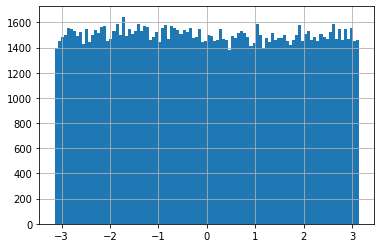

In [51]:
pri_jet_leading = none_colunms["PRI_jet_leading_phi"][none_colunms["PRI_jet_leading_phi"] != -999.0]
pri_jet_leading.hist(bins=100);

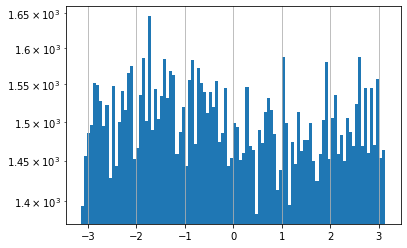

In [52]:
pri_jet_leading.hist(bins=100, log=True);

In [53]:
print(f"Full size {none_colunms['PRI_jet_leading_phi'].shape} and without nulls {pri_jet_leading.shape}")

Full size (250000,) and without nulls (150087,)


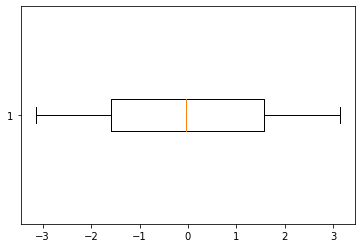

In [54]:
plt.boxplot(pri_jet_leading, vert=False);

In [55]:
print(f"Mean is {pri_jet_leading.mean()} and median is {pri_jet_leading.median()}")

Mean is -0.012392825494546579 and median is -0.033


#### PRI_jet_leading_eta

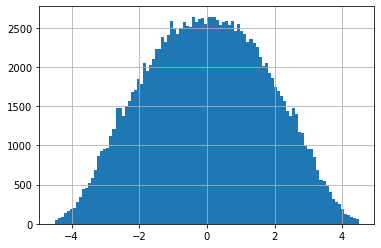

In [56]:
pri_jet_leading = none_colunms["PRI_jet_leading_eta"][none_colunms["PRI_jet_leading_eta"] != -999.0]
pri_jet_leading.hist(bins=100);

In [57]:
print(f"Full size {none_colunms['PRI_jet_leading_eta'].shape} and without nulls {pri_jet_leading.shape}")

Full size (250000,) and without nulls (150087,)


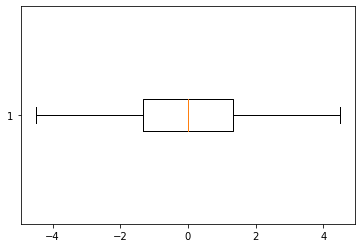

In [58]:
plt.boxplot(pri_jet_leading, vert=False);

In [59]:
print(f"Mean is {pri_jet_leading.mean()} and median is {pri_jet_leading.median()}")

Mean is -0.003274587405971202 and median is 0.0


#### PRI_jet_subleading_pt

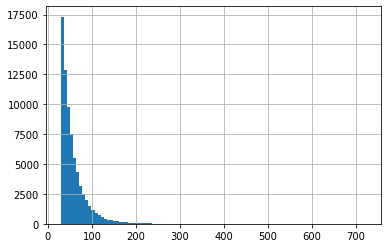

In [60]:
pri_jet_subleading = none_colunms["PRI_jet_subleading_pt"][none_colunms["PRI_jet_subleading_pt"] != -999.0]
pri_jet_subleading.hist(bins=100);

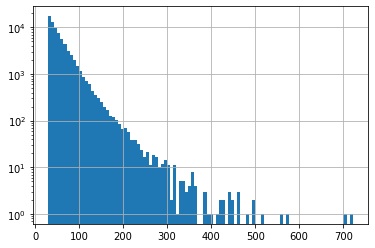

In [61]:
pri_jet_subleading.hist(bins=100, log=True);

In [62]:
print(f"Full size {none_colunms['PRI_jet_subleading_pt'].shape} and without nulls {pri_jet_subleading.shape}")

Full size (250000,) and without nulls (72543,)


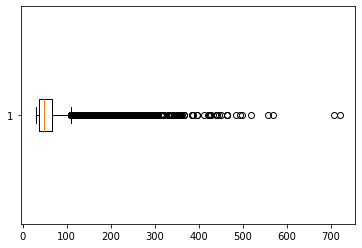

In [63]:
plt.boxplot(pri_jet_subleading, vert=False);

In [64]:
print(f"Mean is {pri_jet_subleading.mean()} and median is {pri_jet_subleading.median()}")

Mean is 57.67947442206703 and median is 47.902


#### PRI_jet_subleading_phi

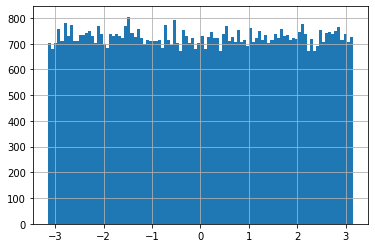

In [65]:
pri_jet_subleading = none_colunms["PRI_jet_subleading_phi"][none_colunms["PRI_jet_subleading_phi"] != -999.0]
pri_jet_subleading.hist(bins=100);

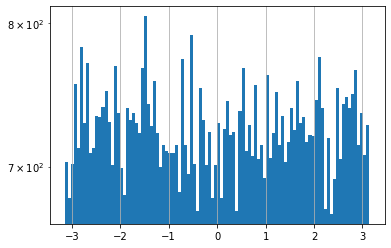

In [66]:
pri_jet_subleading.hist(bins=100, log=True);

In [67]:
print(f"Full size {none_colunms['PRI_jet_subleading_phi'].shape} and without nulls {pri_jet_subleading.shape}")

Full size (250000,) and without nulls (72543,)


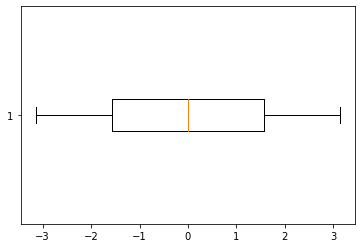

In [68]:
plt.boxplot(pri_jet_subleading, vert=False);

In [69]:
print(f"Mean is {pri_jet_subleading.mean()} and median is {pri_jet_subleading.median()}")

Mean is -0.0015822891250705964 and median is -0.002


#### PRI_jet_subleading_eta

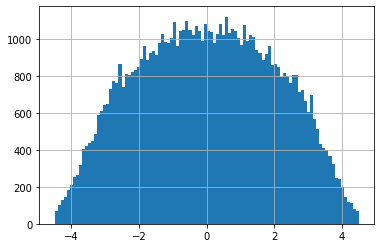

In [70]:
pri_jet_subleading = none_colunms["PRI_jet_subleading_eta"][none_colunms["PRI_jet_subleading_eta"] != -999.0]
pri_jet_subleading.hist(bins=100);

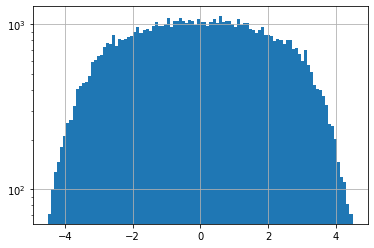

In [71]:
pri_jet_subleading.hist(bins=100, log=True);

In [72]:
print(f"Full size {none_colunms['PRI_jet_subleading_eta'].shape} and without nulls {pri_jet_subleading.shape}")

Full size (250000,) and without nulls (72543,)


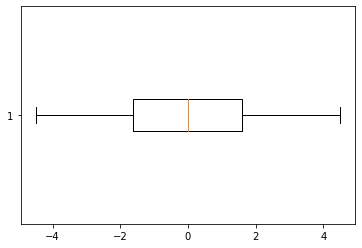

In [73]:
plt.boxplot(pri_jet_subleading, vert=False);

In [74]:
print(f"Mean is {pri_jet_subleading.mean()} and median is {pri_jet_subleading.median()}")

Mean is -0.011845264188136709 and median is -0.01


In [75]:
none_colunms.join(y)[(none_colunms["DER_mass_MMC"] == -999.0)
             & (none_colunms["DER_deltaeta_jet_jet"] == -999.0) 
             & (none_colunms["PRI_jet_leading_eta"] == -999.0)]["Prediction_enum"].value_counts()

0    24564
1     1559
Name: Prediction_enum, dtype: int64

#